## 딥러닝이란?

# 딥러닝 간단 실습

### y = wx

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 가중치(weigt)
w = 3 # 찾고자 하는 가중치

In [ ]:
# x 데이터
x = np.random.rand(20) * 10 # 0에서 10사이 값 20개 생성
x

array([6.86093226, 8.32772788, 6.35024177, 3.03615926, 9.44311937,
       9.74728149, 6.44827848, 9.1966842 , 6.04395309, 9.96136769,
       6.42762939, 3.10159056, 0.67080446, 9.35488323, 6.78264172,
       7.40379072, 7.97473605, 2.68037209, 1.23765497, 0.30800969])

In [ ]:
# y 데이터 (noise 포함)
noise = np.random.uniform(-2, 2, 20)  # -2에서 +2 사이의 균등 분포 노이즈
y_true = w * x + noise
y_true

array([20.71611   , 26.13045495, 17.56909029,  9.10550103, 26.68980689,
       27.82459383, 17.83529103, 27.76159843, 17.07503138, 29.57432628,
       20.80017688, 10.74083227,  1.98749582, 26.5166046 , 20.06167036,
       23.18705266, 25.10907667,  7.85166129,  5.68006864,  0.96207583])

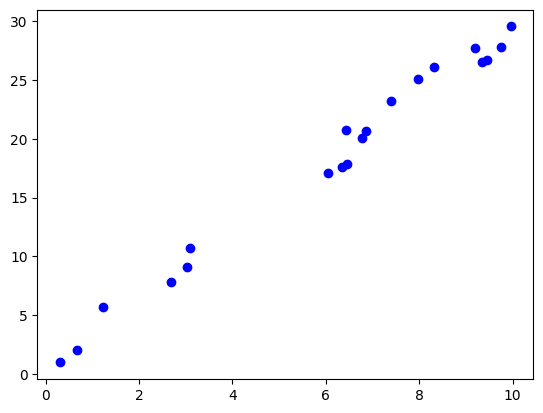

In [ ]:
# 그래프
plt.scatter(x, y_true, color='blue', label='True y')
plt.show()

In [ ]:
# 초기 가중치 w_pred
w_pred = 0.1
w_pred

0.1

In [ ]:
# 예측값
y_pred = w_pred * x
y_pred

array([0.68609323, 0.83277279, 0.63502418, 0.30361593, 0.94431194,
       0.97472815, 0.64482785, 0.91966842, 0.60439531, 0.99613677,
       0.64276294, 0.31015906, 0.06708045, 0.93548832, 0.67826417,
       0.74037907, 0.79747361, 0.26803721, 0.1237655 , 0.03080097])

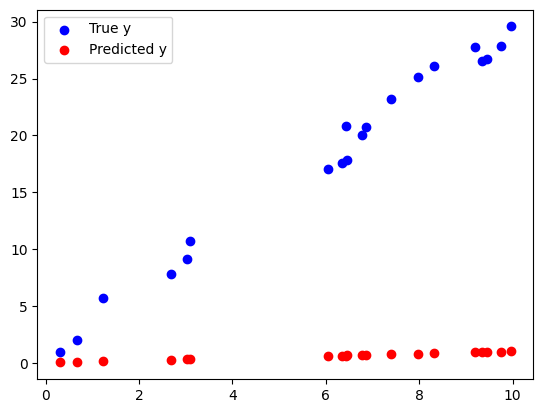

In [ ]:
# 그래프
plt.scatter(x, y_true, color='blue', label='True y')
plt.scatter(x, y_pred, color='red', label='Predicted y')
plt.legend()
plt.show()

## 경사하강법

### 오차

In [ ]:
# 오차 계산
error = y_true - y_pred
print(error)
error.mean()

[20.03001678 25.29768217 16.93406611  8.80188511 25.74549496 26.84986568
 17.19046318 26.84193001 16.47063607 28.57818951 20.15741394 10.43067322
  1.92041537 25.58111628 19.38340619 22.44667359 24.31160307  7.58362408
  5.55630315  0.93127486]


17.552136665493535

- 음수, 양수값 처리
- 작은 오차, 큰 오차
- 미분 가능

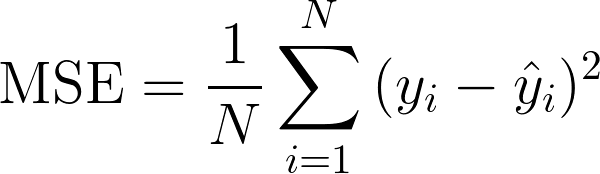

In [ ]:
# 오차 계산
error = (y_true - y_pred)**2
print(error)
error.mean()

[401.20157209 639.97272299 286.76259513  77.47318145 662.83051062
 720.91528706 295.51202434 720.48920642 271.28185267 816.7129156
 406.32133693 108.79894378   3.68799521 654.39350988 375.71643546
 503.8531551  591.05404367  57.51135417  30.87250467   0.86727286]


381.3114210049365

In [ ]:
w_pred2 = w_pred

In [ ]:
# 가중치 업데이트1
# dw는 MSE 손실 함수를 가중치 w에 대해 편미분한 값
# 그리고 이전 가중치 w_pred에서 학습률(learning_rate)에 의해 스케일된 dw를 뺀 값으로 가중치를 업데이트

learning_rate = 0.01
dw = (y_pred - y_true)*x
print("이전 가중치:", w_pred)
w_pred = (w_pred - learning_rate * dw).mean()
print("업데이트 가중치:", w_pred)

이전 가중치: 0.1
업데이트 가중치: 1.4253306848613225


In [ ]:
# 가중치 업데이트2
# dot 활용 -> 비용함수(MSE)의 그래디언트(기울기 계산)를 계산하여, 그래디언트가 가리키는 방향으로 가중치 w를 업데이트 함
error = y_true - y_pred
w_pred2 += learning_rate * np.dot(error, x) / len(x)
print("업데이트 가중치:", w_pred2)

업데이트 가중치: 1.4253306848613225


In [ ]:
# 예측값
y_pred = w_pred * x
y_pred

array([ 9.77909728, 11.86976609,  9.05119446,  4.32753096, 13.45956779,
       13.8930994 ,  9.19092918, 13.10831619,  8.6146318 , 14.19824304,
        9.1614974 ,  4.4207922 ,  0.95611818, 13.33380212,  9.66750737,
       10.5528501 , 11.366636  ,  3.82041658,  1.76406761,  0.43901566])

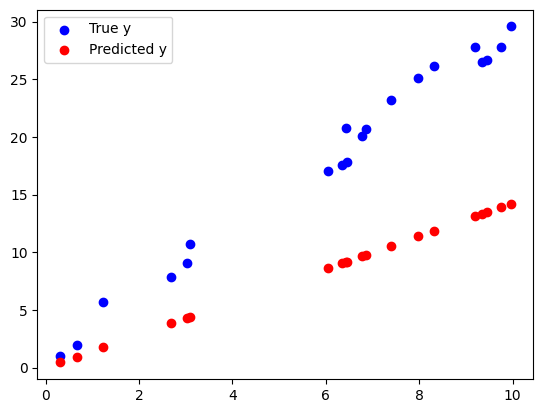

In [ ]:
# 그래프
plt.scatter(x, y_true, color='blue', label='True y')
plt.scatter(x, y_pred, color='red', label='Predicted y')
plt.legend()
plt.show()

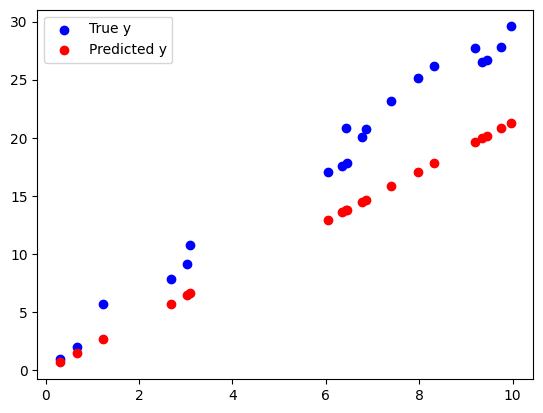

In [ ]:
# # 학습률
learning_rate = 0.01

# 오차 계산
error = y_true - y_pred

# W_pred 업데이트 (경사 하강법)
w_pred += learning_rate * np.dot(error, x) / len(x)

# 새로운 y 예측값 계산
y_pred = w_pred * x

# 그래프
plt.scatter(x, y_true, color='blue', label='True y')
plt.scatter(x, y_pred, color='red', label='Predicted y')
plt.legend()
plt.show()

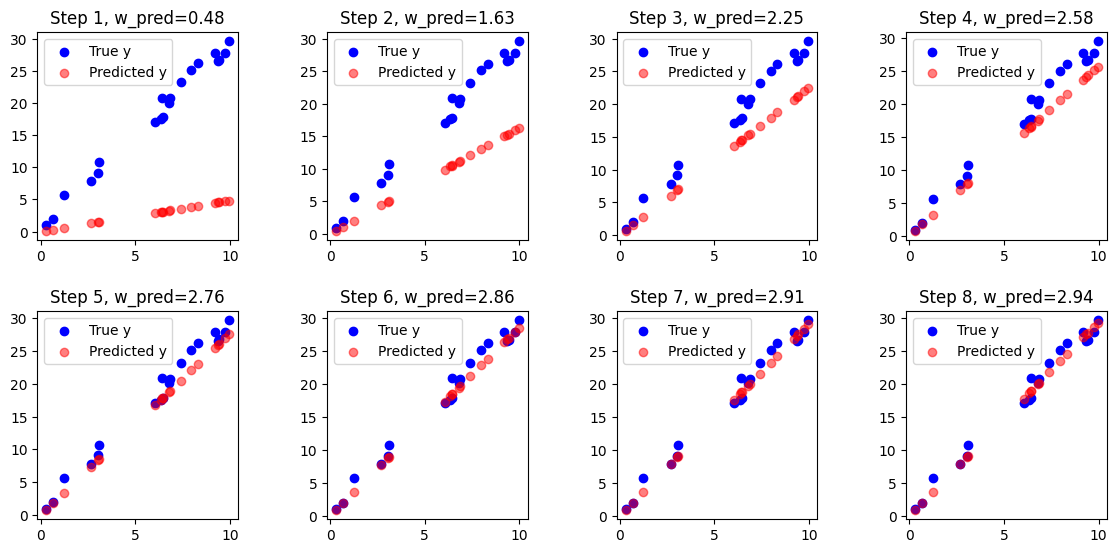

In [ ]:
# 학습률
w_pred=0.1
learning_rate = 0.01

# 그리드 크기 설정
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
fig.tight_layout(pad=3.0)

for i in range(8):
    # 오차 계산
    error = y_true - y_pred

    # W_pred 업데이트 (경사 하강법)
    w_pred += learning_rate * np.dot(error, x) / len(x)

    # 새로운 y 예측값 계산
    y_pred = w_pred * x

    # 그래프
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    ax.scatter(x, y_true, color='blue', label='True y')
    ax.scatter(x, y_pred, color='red', label='Predicted y', alpha=0.5)
    ax.set_title(f'Step {i+1}, w_pred={w_pred:.2f}')
    ax.legend()

- 그래디언트 디센트
- SGD 미니 배치

## 텐서플로 활용

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 세팅
w = 3
w_pred = tf.Variable(0.1)
learning_rate = 0.01

# x 데이터
x = np.random.rand(20) * 10 # 0에서 10사이 값 20개 생성

# y 데이터 (noise 포함)
noise = np.random.uniform(-2, 2, 20)  # -2에서 +2 사이의 균등 분포 노이즈
y_true = w * x + noise

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.655481>


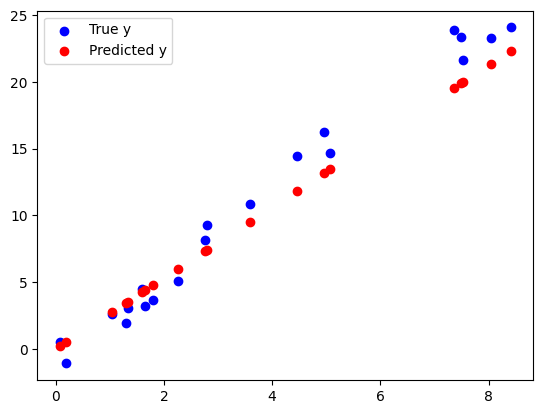

In [ ]:
# 텐서플로의 GradientTape를 사용하여 자동 미분(automatic differentiation) 수행
# tape.gradient(loss, w_pred)는 손실 함수(loss)에 대한 가중치 w_pred의 그래디언트 계산
# 그리고 w_pred.assign_sub(learning_rate * gradients)를 통해 계산된 그래디언트 값에 학습률을 곱한 값을 기존 가중치 w_pred에서 뺴서 업데이트

print(w_pred)
with tf.GradientTape() as tape:
    # y 예측값 계산
    y_pred = w_pred * x

    # MSE 손실 함수 계산
    loss = tf.reduce_mean((y_true - y_pred) ** 2)

# 손실 함수에 대한 w_pred의 그래디언트 계산
gradients = tape.gradient(loss, w_pred)

# 그래디언트를 사용하여 가중치 업데이트
w_pred.assign_sub(learning_rate * gradients)

# 그래프
plt.scatter(x, y_true, color='blue', label='True y')
plt.scatter(x, y_pred, color='red', label='Predicted y')
plt.legend()
plt.show()